---

**Болатаева Дарья**

Нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подгрузим наши данные ``weatherHistory.scv`` и посмотрим на них:

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Удалим переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).

- `Daily Summary` (будем использовать просто `Summary`). 

- `Apparent Temperature`

Можно заметить, что показатель "кажущейся температуры" является *индексом*, который характеризует эффект воздействия на человека комплекса метеоэлементов. Т.е. в нем уже заложена информация, которую изначально несут переменные, связанные с температурой, влажностью воздуха и скоростью ветра. А значит -- следует ее удалить во избежание дублирования информации в модели. 

In [3]:
df = df.drop(['Formatted Date', 'Apparent Temperature (C)', 'Daily Summary'], axis = 1)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51


У нас имеется 96453 наблюдения. Можно заметить, что есть пропущенные значения в переменной ``Precip Type``.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  object 
 1   Precip Type             95936 non-null  object 
 2   Temperature (C)         96453 non-null  float64
 3   Humidity                96453 non-null  float64
 4   Wind Speed (km/h)       96453 non-null  float64
 5   Wind Bearing (degrees)  96453 non-null  float64
 6   Visibility (km)         96453 non-null  float64
 7   Loud Cover              96453 non-null  float64
 8   Pressure (millibars)    96453 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.6+ MB


Вего пропущено 517 наблюдений (т.е. 0.5% от общего числа). Удалим их.

In [5]:
df.isnull().sum()

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [6]:
df = df.dropna()

# убедимся в том, что все пропуски обработаны 

df.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
dtype: int64

In [7]:
# посмотрим на описательные статистики

df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Переменная ``Loud Cover`` не несет в себе информации для предсказания целевой переменной, поскольку не имеет разброса. Ее значения не меняются, или остаются постоянными (т.е. константа) по всей выборке.

array([[<AxesSubplot:title={'center':'Loud Cover'}>]], dtype=object)

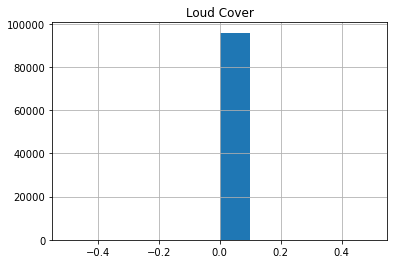

In [8]:
# визуализируем распределение --> убедимся, что переменная не изменяется

df.hist(column = 'Loud Cover')

In [9]:
df = df.drop(['Loud Cover'], axis = 1)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


Преобразуем категориальные переменные при помощи One Hot Encoding (то есть переведем их в дамми-переменные).

In [10]:
var_cat = ['Precip Type', 'Summary']

In [11]:
# чтобы все категории стали object

df[var_cat] = df[var_cat].astype(str)  

dff = pd.get_dummies(df, drop_first = True, dummy_na = False)

Выведем корреляционную матрицу переменных. 


<AxesSubplot:>

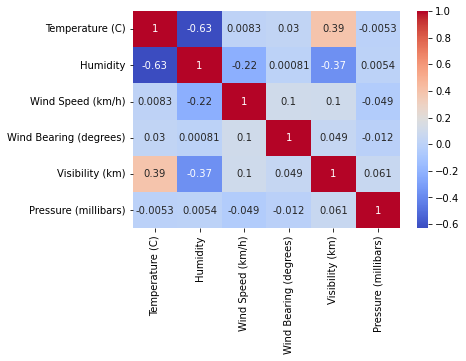

In [12]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

Лучше всего с целевой переменной -- ``Temperature (C)``, то есть с температурой воздуха связаны (в порядке убывания силы корреляции):

1) влажность воздуха (``Humidity``), причем отрицательно: чем больше нагревается воздух, тем меньше относительная влажность;

2) видимость (``Visibility``), причем положительно: чем больше температура воздуха, тем лучше видимость атмосферы;

3) и направление ветра (``Wind Bearing``), причем положительно; сила связи низкая относительно влажности воздуха и атмосферной видимости (но все-таки ненулевая по сравнению со скоростью ветра и атмосферным давлением).

In [13]:
# определим целевую переменную

y = dff['Temperature (C)']

# определим регрессоры

X = dff.drop('Temperature (C)', axis = 1)

Проверим, похоже ли распределение целевой переменной на нормальное.

In [14]:
dff.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,...,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,0.734841,10.804936,187.518773,10.362402,1003.150038,0.000010,0.000365,0.005379,0.005504,...,0.172156,0.329751,0.000104,0.000083,0.000010,0.000042,0.000365,0.000469,0.000698,0.111658
std,9.570671,0.195724,6.920727,107.385351,4.173780,117.276976,0.003229,0.019097,0.073142,0.073983,...,0.377518,0.470125,0.010209,0.009131,0.003229,0.006457,0.019097,0.021653,0.026418,0.314947
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,0.600000,5.796000,116.000000,8.372000,1011.890000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Temperature (C)'}>]], dtype=object)

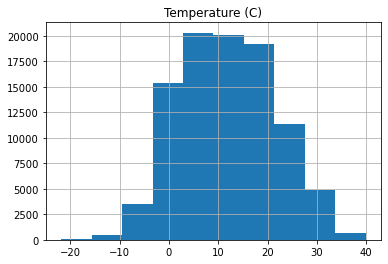

In [15]:
# посмотрим на распределение целевой переменной

dff.hist(column = 'Temperature (C)')

Распределение приближается к нормальному: большинство значений сгруппированы вокруг среднего; кроме того, значения выборочного среднего и медианы почти одинаковы (12 градусов Цельсия). По Гистограмме видно, что распределение тяготеет к форме "колокольчика", т.е.в целом симметрично.

### Часть 2: Построение предсказательной модели 

Будем предсказывать (объяснять) величину $y$ через набор числовых характеристик $x_1, x_2, ..., x_n$. Спецификация модели примет следующий вид (т.е. предполагается *линейная* взаимосвязь):

$$y_i = \beta_0 + \beta_1Humidity + \beta_2WindSpeed + \beta_3WindBearing + \beta_4Visibility + \beta_5Pressure + \beta_6PrecipTypeSnow + \varepsilon_i$$


Обоснование выбора переменных:

- $Humidity$ – уже исходя из информации о силе корреляции между двумя признаками (между регрессором и целевой переменной, то есть между влажностью и температурой соответственно) есть основания предполагать, что влажность крайне хорошо предсказывает температуру воздуха: при высокой влажности воздух холоднее. 


- $WindSpeed$ – показатель используется в предположении о том, что увеличение скорости ветра хорошо предсказывает ухудшение погоды, связанного с приближением атмосферного фронта, и, как следствие, уменьшение температуры воздуха (похолодание) в градусах Цельсия.


- $WindBearing$ – направление ветра также хорошо объясняет изменение температуры: например, северный ветер приносит чаще всего холод и делает воздух сухим.


- $Visibility$ – атмосферная видимость может также объяснять изменения в температуре воздуха: так, туманы образуются вследствие охлаждения теплого воздуха (и связаны, как следствие, с понижением температуры).


- $Pressure$ – давление и температура воздуха прямо связаны: научно известно, что при повышении температуры воздуха атмосферное давление падает, а при понижении температуры – растет.


- $PrecipTypeSnow$ – было бы странно, если бы тип осадков (дождь/снег) не предсказывал температуру воздуха: выпадение снега нехарактерно для теплых сезонов, когда температура воздуха в среднем выше.


In [16]:
X1 = dff[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 
          'Precip Type_snow']]

Разделим выборку на обучающую и тестовую.

In [17]:
from sklearn.model_selection import train_test_split

# делим в пропорции 70 к 30

y_train, y_test, X1_train, X1_test = train_test_split(y, X1, test_size = 0.30, random_state = 42)

Построим предсказательную модель. Оценим ее качество.

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# обучили модель на тренировочной выборке

model.fit(X1_train, y_train)

# прогноз на тестовой выборке

y_pred = model.predict(X1_test)

In [19]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# среднеквадратическая ошибка

rmse(y_test, y_pred)

5.969601706368108

Представленная Модель в среднем ошибается при прогнозе на 5.97. Т.е. разница между наблюдаемыми и предсказанными значениями температуры воздуха в среднем составляет ~6 градусов Цельсия.

In [20]:
from sklearn.metrics import r2_score

# R^2 или коэффициент детерминации
r2_score(y_test, y_pred)

0.611660475885194

Наша модель объясняет около 61% процента разброса в исходных данных! Это неплохой результат -- модель информативна.

Посмотрим также, какие предикторы оказывают наибольший вклад в зависимую переменную. 

In [21]:
features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 
            'Precip Type_snow']

In [22]:
for co, fe in zip(model.coef_, features):
    print(fe, round(co, 2))

Humidity -26.35
Wind Speed (km/h) -0.21
Wind Bearing (degrees) 0.0
Visibility (km) 0.17
Pressure (millibars) -0.0
Precip Type_snow -12.87


In [23]:
from sklearn.preprocessing import MinMaxScaler

# cоздаём инструмент для нормализации признаков

min_max_scaler = MinMaxScaler()

# преобразуем признаки (на выходе будет np.ndarray)

X1_scaled = min_max_scaler.fit_transform(X1)

# преобразуем np.ndarray обратно в pandas таблицу для удобства

X1_scaled = pd.DataFrame(X1_scaled, columns = X1.columns)

X1_scaled.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_snow
0,0.89,0.221130,0.699164,0.983,0.970135,0.0
1,0.86,0.223399,0.721448,0.983,0.970613,0.0
2,0.89,0.061523,0.568245,0.929,0.970909,0.0
3,0.83,0.220877,0.749304,0.983,0.971358,0.0
4,0.83,0.172970,0.721448,0.983,0.971454,0.0


In [24]:
from sklearn.model_selection import train_test_split

# делим в пропорции 70 к 30

y_train, y_test, X1sc_train, X1sc_test = train_test_split(y, X1_scaled, test_size = 0.30, random_state = 42)

# обучили модель на тренировочной выборке

model.fit(X1sc_train, y_train)

# прогноз на тестовой выборке

y_pred = model.predict(X1sc_test)

In [25]:
for co, fe in zip(model.coef_, features):
    print(fe, round(co, 2))

Humidity -26.35
Wind Speed (km/h) -13.64
Wind Bearing (degrees) 0.85
Visibility (km) 2.74
Pressure (millibars) -0.85
Precip Type_snow -12.87


*Теперь можем дать интерпретацию после приведения значений регрессоров к единой шкале (через нормализацию):*

*Видим, что больший вклад вносят предикторы ``Humidity``, ``Wind Speed (km/h)`` и ``Precip Type_snow``: влажность воздуха, скорость ветра и вид осадков соответственно. Наименьший вклад (т.е. почти не объясняют) вносят предикторы ``Wind Bearing (degrees)``, ``Visibility (km)`` и ``Pressure (millibars)``: направление ветра, атмосферная видимость и давление соответственно.*

- *Так, в случае, где значение показателя влажности воздуха (``Humidity``) выше на 1 единицу измерения, 
температура воздуха (``Temperature (C)``) будет в среднем ниже на 26.35 градусов Цельсия при прочих равных.*


- *Так, в случае, где значение показателя скорости ветра (``Wind Speed (km/h)``) выше на 1 единицу измерения, температура воздуха (``Temperature (C)``) будет в среднем ниже на 13.64 градуса Цельсия про прочих равных.*


- *Так, в случае, где идет снег (``Precip Type_snow = 1``), температура воздуха будет в среднем ниже на 12.87 градусов Цельсия про прочих равных.*